In [1]:
import torch
import torch.nn.functional as F
import numpy as np

device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f"Current device: {device}")
torch.set_default_device(device)

!cp ../MIS.py ./
!cp ../metric.py ./
import MIS
from MIS import task_config, run_psychophysics

Current device: cuda


In [2]:
from torchvision.datasets import CIFAR10

train_CIFAR10 = CIFAR10(root="./", download=True, train=True)
CIFAR10_data = [data[0] for data in train_CIFAR10]
del train_CIFAR10

Files already downloaded and verified


In [3]:
activations_original = torch.load("example-activations.pt", map_location=device, weights_only=True)
neuron_axes = torch.load("example-axes.pt", map_location=device, weights_only=True)
activations_new = torch.t(torch.matmul(neuron_axes , torch.t(activations_original)) )


CIFAR10_task_old = task_config(device, CIFAR10_data, activations_original)
CIFAR10_task_new = task_config(device, CIFAR10_data, activations_new)

In [4]:
metric_type = "dreamsim"
K = 9
N = 100
quantile = 0.25
alpha=None

seed = 256
MIS_old = run_psychophysics(seed, CIFAR10_task_old, metric_type=metric_type, K=K, N=N, quantile=quantile, alpha=alpha)
seed = 128
MIS_new = run_psychophysics(seed, CIFAR10_task_new, metric_type=metric_type, K=K, N=N, quantile=quantile, alpha=alpha)

Using cached ./models


Using cache found in ./models/facebookresearch_dino_main
/grid/klindt/home/sliu/projects/Mechanistic_Interpretability/run_env/lib/python3.12/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
  0%|          | 0/782 [00:00<?, ?it/s]

Preprocessing images for DREAMSIM...


100%|██████████| 782/782 [08:30<00:00,  1.53it/s]


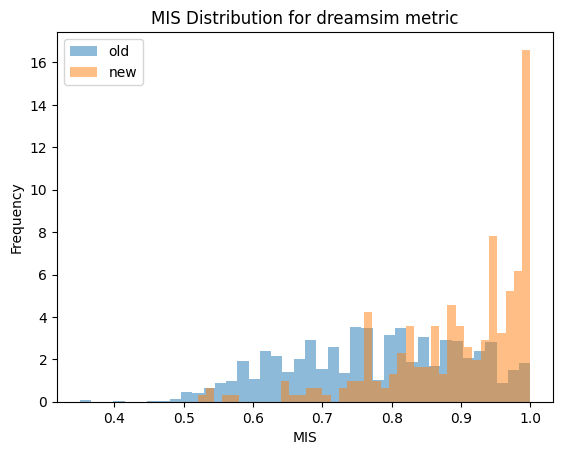

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.hist(MIS_old.detach().cpu().numpy(), bins=40, alpha=0.5, density=True, label="old")
ax.hist(MIS_new.detach().cpu().numpy(), bins=40, alpha=0.5, density=True, label="new")
ax.legend()
ax.set_xlabel("MIS")
ax.set_ylabel("Frequency")
ax.set_title(f"MIS Distribution for {metric_type} metric")
plt.show()
